In [1]:
!pip install optuna
!pip install optuna-integration[sklearn]
!pip install phik

     |████████████████████████████████| 383 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 638 kB/s eta 0:00:01
     |████████████████████████████████| 686 kB 1.0 MB/s eta 0:00:01


In [2]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.11.0


     |████████████████████████████████| 9.6 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 235 kB 51.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 95.7 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
from scipy.stats import chi2_contingency
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, OrdinalEncoder,
                                   StandardScaler, MinMaxScaler)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import (mean_absolute_error, r2_score, mean_squared_error,
                             accuracy_score, roc_auc_score, confusion_matrix,
                             recall_score, precision_score, make_scorer)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import (SelectKBest, mutual_info_regression,
                                       mutual_info_classif)
from optuna import distributions
from optuna.integration import OptunaSearchCV

from phik.report import plot_correlation_matrix
from phik import report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
from scipy.stats import chi2_contingency
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, OrdinalEncoder,
                                   StandardScaler, MinMaxScaler)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import (mean_absolute_error, r2_score, mean_squared_error,
                             accuracy_score, roc_auc_score, confusion_matrix,
                             recall_score, precision_score, make_scorer)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import (SelectKBest, mutual_info_regression,
                                       mutual_info_classif)
from optuna import distributions
from optuna.integration import OptunaSearchCV

from phik.report import plot_correlation_matrix
from phik import report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [5]:
RANDOM_STATE = 42

# HR-аналитики компании «Работа с заботой»

## Введение

Компания «Работа с заботой» предоставляет бизнесу аналитические услуги, направленные на оптимизацию управления персоналом. Основная цель проекта — помочь компании быстрее и точнее отвечать на ключевые вопросы, связанные с управлением кадрами, используя машинное обучение

Компании предоставили данные о сотрудниках, включая следующие характеристики:

+ Личные и профессиональные характеристики сотрудников.

+ Уровень удовлетворённости работой (доля от 0 до 1).

        + Значение 0 — полностью неудовлетворён.
        + Значение 1 — полностью удовлетворён.

Уровень удовлетворённости был рассчитан на основе опросников, которые сотрудники заполняли для обратной связи. Сбор этих данных представляет сложности из-за масштабов компании и необходимости обеспечить прохождение опроса всеми сотрудниками.

**Задачи проекта**

1. Построить модель для предсказания уровня удовлетворённости сотрудника на основе предоставленных данных.

2. Построить модель для предсказания вероятности увольнения сотрудника.


## План работы

### Этап 1: Задача 1. Предсказание уровня удовлетворённости сотрудника

1. **Загрузка данных:**
   - Загрузить тренировочную выборку `train_job_satisfaction_rate.csv`
   - Загрузить тестовую выборку: входные признаки `test_features.csv`, целевой признак `test_target_job_satisfaction_rate.csv`

2. **Предобработка данных:**
   - Изучить данные на наличие пропусков, выбросов и некорректных значений
   - Выполнить предобработку данных: обработка пропусков, приведение типов

3. **Исследовательский анализ данных:**
   - Исследовать распределение признаков
   - Определить значимость признаков для целевой переменной
   - Проверить наличие корреляций и выбросов

4. **Подготовка данных:**
   - Создать пайплайн предобработки: заполнение пропусков, нормализация, кодирование признако

5. **Обучение моделей:**
   - Обучить минимум две модели: линейную модель и дерево решений
   - Настроить гиперпараметры с помощью сеточного поиска или другого инструмента
   - Выбрать лучшую модель по метрике SMAPE (должна быть ≤15 на тестовой выборке)

6. **Оценка моделей:**
   - Реализовать функцию для расчёта метрики SMAPE
   - Сравнить качество моделей и выбрать лучшую

7. **Выводы:**
   - Сделать промежуточные выводы по первой задаче

### Этап 2: Задача 2. Предсказание увольнения сотрудника

1. **Загрузка данных:**
   - Загрузить тренировочную выборку `train_quit.csv`.
   - Загрузить тестовую выборку: входные признаки `test_features.csv`, целевой признак `test_target_quit.csv`.

2. **Предобработка данных:**
   - Изучить данные на наличие пропусков, выбросов и некорректных значений
   - Выполнить предобработку: заполнение пропусков, приведение типов

3. **Исследовательский анализ данных:**
   - Изучить распределение признаков и их связь с целевым признаком `quit`
   - Построить портрет "уволившегося сотрудника":
     - Анализ отделов, загруженности, зарплаты и других факторов
   - Визуализировать распределение `job_satisfaction_rate` для ушедших и оставшихся сотрудников

4. **Добавление нового признака:**
   - Использовать предсказания уровня удовлетворённости из первой задачи как дополнительный признак

5. **Подготовка данных:**
   - Создать пайплайн предобработки: заполнение пропусков, нормализация, кодирование признаков 

6. **Обучение моделей:**
   - Обучить минимум три модели
   - Настроить гиперпараметры для двух моделей
   - Оценить качество моделей по метрике ROC-AUC (должна быть ≥0.91 на тестовой выборке)

7. **Выводы:**
   - Сделать промежуточные выводы по второй задаче

### Этап 3: Общий вывод

1. **Описание задач:**
   - Предсказание уровня удовлетворённости сотрудников
   - Предсказание увольнения сотрудников

2. **Описание этапов работы:**
   - Анализ данных, предобработка, исследовательский анализ
   - Построение моделей и оценка их качества
   - Использование итогов первой задачи для улучшения качества второй

3. **Выводы и рекомендации:**
   - Сравнить эффективность моделей и обоснование их выбора
   - Предложить бизнесу рекомендации по использованию результатов для предотвращения оттока сотрудников и повышения удовлетворённости

## Задача 1: предсказание уровня удовлетворённости сотрудника

### Шаг 1. Загрузка данных

In [7]:
train_data_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', index_col='id')
test_features_job = pd.read_csv('/datasets/test_features.csv', index_col='id')
test_target_job = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', index_col='id')

Создадим функцию для более подробного изучения первчиной информации

In [8]:
datasets_str = ['train_data_job', 'test_features_job', 'test_target_job']
datasets = [train_data_job, test_features_job, test_target_job]

In [9]:
def data_info(dataset):
    print("Первые строки датафрейма")
    display(dataset.head())
    print('\n\nПервичная информация')
    dataset.info()
    print('-' * 50)
    print('\n\n')

In [10]:
for i, dataset in enumerate(datasets):
    print(datasets_str[i])
    data_info(dataset)

train_data_job
Первые строки датафрейма


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20




Первичная информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB
--------------------------------------------------



test_features_job
Первые строки датафрейма


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800




Первичная информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB
--------------------------------------------------



test_target_job
Первые строки датафрейма


,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08




Первичная информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB
--------------------------------------------------





#### Вывод

Данные в таблицах соответствуют описанию

Заметим, что в данных есть пропуски

Столбцы датафреймов соответствуют стандартам и не требуют переименования

### Шаг 2. Предобработка данных

#### Обьединение таблиц

In [11]:
datasets_str

['train_data_job', 'test_features_job', 'test_target_job']

Обьединим Целевой признак тестовой выборки со входными признаками тестовой выборки

In [12]:
test_data_job = test_features_job.join(test_target_job, how = 'left')
test_data_job.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [13]:
# Check
test_target_job[test_target_job.index == 485046]

,job_satisfaction_rate
id,
485046,0.79


In [14]:
test_data_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1998 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 220.8+ KB


Посмотрим отличаются ли тренировочная и тестовая выборки

In [15]:
train_data_job.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [16]:
test_data_job.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.000000,2000.00000
mean,3.666500,3.526500,34066.800000,0.54878
std,2.537222,0.996892,15398.436729,0.22011
min,1.000000,1.000000,12000.000000,0.03000
25%,1.000000,3.000000,22800.000000,0.38000
50%,3.000000,4.000000,30000.000000,0.58000
75%,6.000000,4.000000,43200.000000,0.72000
max,10.000000,5.000000,96000.000000,1.00000


In [17]:
datasets_str = ['train_data_job', 'test_data_job']
datasets = [train_data_job, test_data_job]

Объединим все данные, для проведения исследовательского анализа данных. Это корректное действие, потому что между датасетами нет серьёзных различий

In [18]:
all_data = pd.concat([train_data_job, test_data_job], axis=0)
all_data.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


#### Поиск дубликатов

In [19]:
string_columns = all_data.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(all_data[col].unique())
    print()

dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan ' ']

level
['junior' 'middle' 'sinior' nan]

workload
['medium' 'high' 'low' ' ']

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']



In [20]:
all_data[all_data['dept'] == ' ']

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
822186,,middle,medium,3,no,no,4,38400,0.64


In [21]:
all_data[all_data['workload'] == ' ']

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
590867,marketing,junior,,4,no,no,4,28800,0.79


Заменим пустые строки на Nan

In [22]:
all_data.loc[all_data['dept'] == ' ', 'dept'] = np.nan
all_data.loc[all_data['workload'] == ' ', 'workload'] = np.nan

In [23]:
all_data.loc[all_data['level'] == 'sinior', 'level'] = 'senior'

In [24]:
#Check
string_columns = all_data.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(all_data[col].unique())
    print()

dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]

level
['junior' 'middle' 'senior' nan]

workload
['medium' 'high' 'low' nan]

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']



In [25]:
all_data.loc[all_data['dept'] == 'sinior', 'dept'] = 'senior'

Найдем явные дубликаты

In [26]:
all_data.duplicated().sum()

528

Удалим их

In [27]:
all_data.drop_duplicates(inplace = True)
all_data.duplicated().sum()

0

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 155278 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   5463 non-null   object 
 1   level                  5467 non-null   object 
 2   workload               5471 non-null   object 
 3   employment_years       5472 non-null   int64  
 4   last_year_promo        5472 non-null   object 
 5   last_year_violations   5472 non-null   object 
 6   supervisor_evaluation  5472 non-null   int64  
 7   salary                 5472 non-null   int64  
 8   job_satisfaction_rate  5472 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 427.5+ KB


#### Вывод

Выполнена преобработка данных

Данные обьединены в одну таблицу

Исправлены ошибки в заполнении данных 

Дубликаты удалены

### Шаг 3. Исследовательский анализ данных

In [29]:
all_data[all_data.index == 485046]
all_data.reset_index(inplace = True)
all_data[all_data['id'] == 485046]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
3755,485046,marketing,junior,medium,2,no,no,5,28800,0.79


Обратно разделим тестовую и тренировочную выборки

Все строки ниже индекса `485046` отностяся к тренировочный выборке

In [30]:
# Находим индекс строки с id == 485046
split_index = all_data[all_data['id'] == 485046].index[0]

# Данные для тренировочной выборки
train_data_job = all_data.loc[:split_index - 1]

# Данные для тестовой выборки
test_data_job = all_data.loc[split_index:]

In [31]:
train_data_job.set_index('id', inplace = True)
display(train_data_job.head())
test_data_job.set_index('id', inplace = True)
test_data_job.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75
429973,purchasing,middle,medium,6,no,no,3,42000,0.67


#### Статистический анализ данных

Создадим функцию для исследования данных


Частотное распределение для employment_years (test):
1     377
2     297
3     222
4     180
5     164
7     163
6     131
8      85
9      65
10     33
Name: employment_years, dtype: int64

Процентное соотношение (test):
1     21.956902
2     17.297612
3     12.929528
4     10.483401
5      9.551543
7      9.493302
6      7.629586
8      4.950495
9      3.785673
10     1.921957
Name: employment_years, dtype: float64


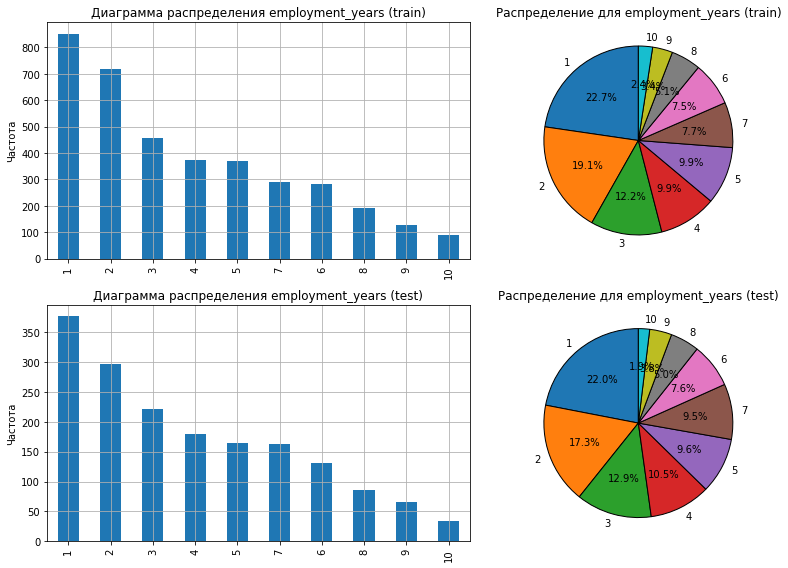


-------------------

Частотное распределение для supervisor_evaluation (test):
4    684
3    498
5    259
2    189
1     87
Name: supervisor_evaluation, dtype: int64

Процентное соотношение (test):
4    39.836925
3    29.004077
5    15.084450
2    11.007571
1     5.066977
Name: supervisor_evaluation, dtype: float64


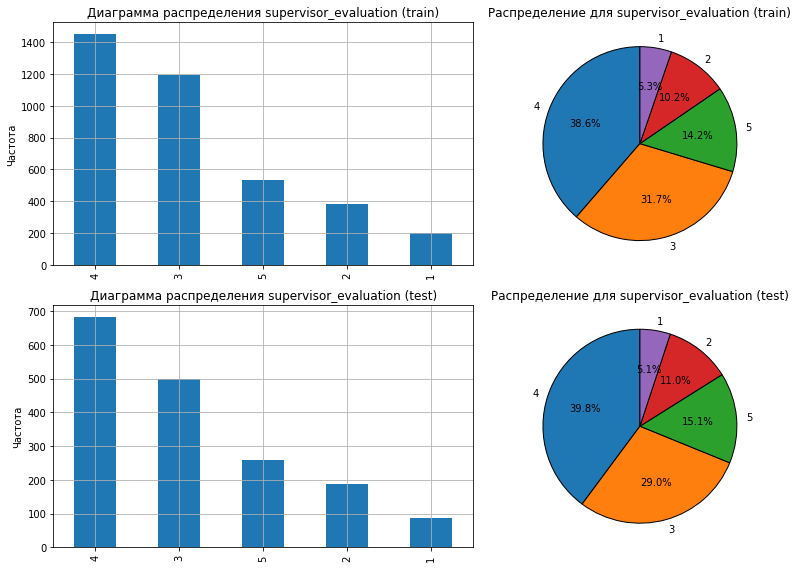


-------------------
salary
count     3755.000000
mean     34457.416778
std      15050.643870
min      12000.000000
25%      22800.000000
50%      31200.000000
75%      44400.000000
max      98400.000000
Name: salary, dtype: float64
count     1717.000000
mean     35521.956902
std      15754.893091
min      12000.000000
25%      24000.000000
50%      31200.000000
75%      45600.000000
max      96000.000000
Name: salary, dtype: float64


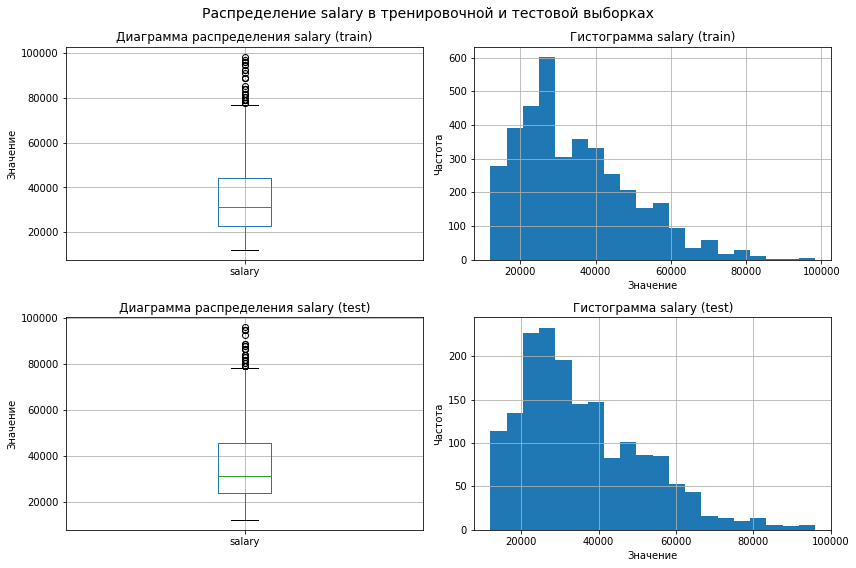


-------------------
job_satisfaction_rate
count    3755.000000
mean        0.532554
std         0.226393
min         0.030000
25%         0.350000
50%         0.550000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64
count    1717.000000
mean        0.546185
std         0.222516
min         0.030000
25%         0.370000
50%         0.570000
75%         0.720000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


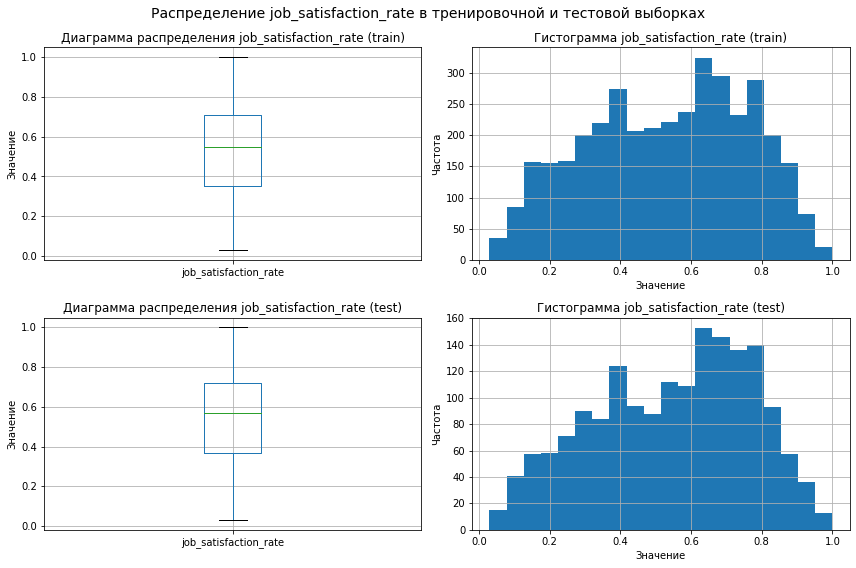


-------------------

Частотное распределение для dept (test):
sales         596
technology    401
marketing     259
purchasing    255
hr            203
Name: dept, dtype: int64

Процентное соотношение (test):
sales         34.772462
technology    23.395566
marketing     15.110852
purchasing    14.877480
hr            11.843641
Name: dept, dtype: float64


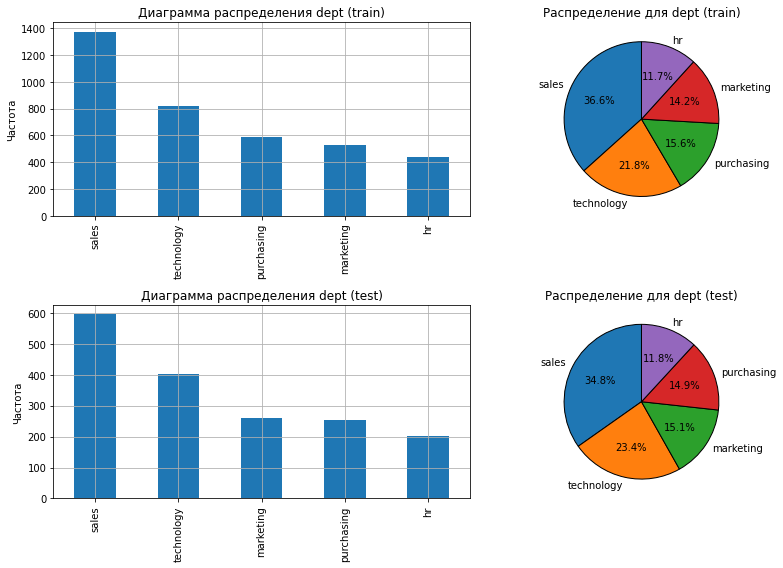


-------------------

Частотное распределение для level (test):
middle    798
junior    749
senior    169
Name: level, dtype: int64

Процентное соотношение (test):
middle    46.503497
junior    43.648019
senior     9.848485
Name: level, dtype: float64


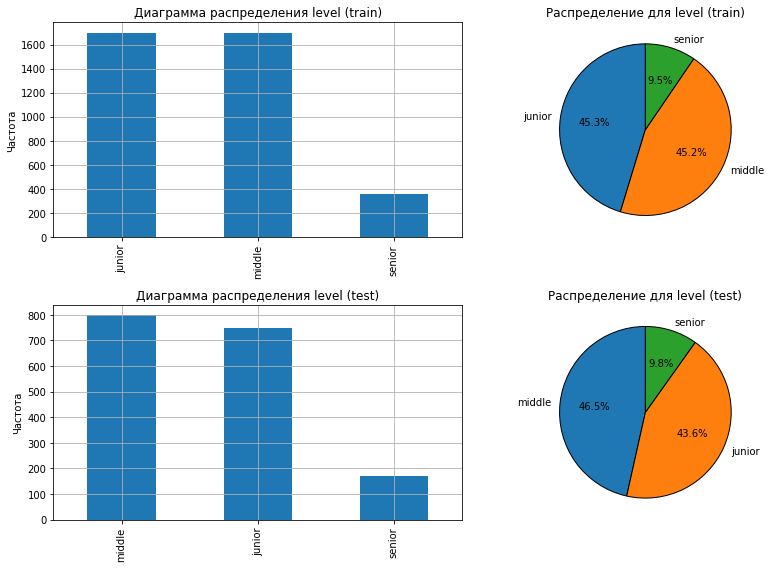


-------------------

Частотное распределение для workload (test):
medium    868
low       494
high      354
Name: workload, dtype: int64

Процентное соотношение (test):
medium    50.582751
low       28.787879
high      20.629371
Name: workload, dtype: float64


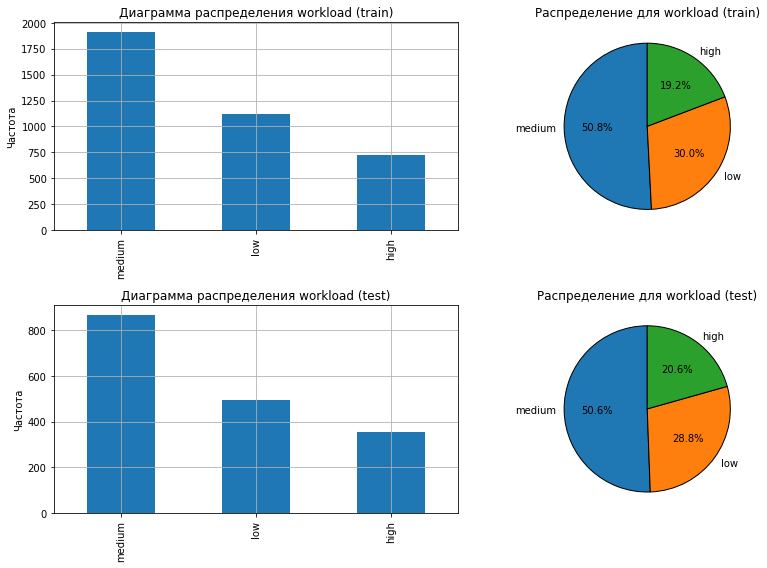


-------------------

Частотное распределение для last_year_promo (test):
no     1654
yes      63
Name: last_year_promo, dtype: int64

Процентное соотношение (test):
no     96.33081
yes     3.66919
Name: last_year_promo, dtype: float64


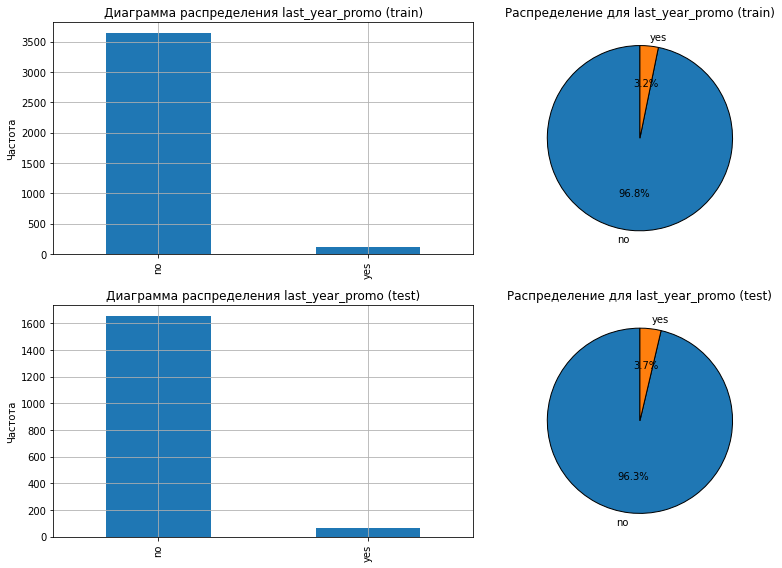


-------------------

Частотное распределение для last_year_violations (test):
no     1467
yes     250
Name: last_year_violations, dtype: int64

Процентное соотношение (test):
no     85.43972
yes    14.56028
Name: last_year_violations, dtype: float64


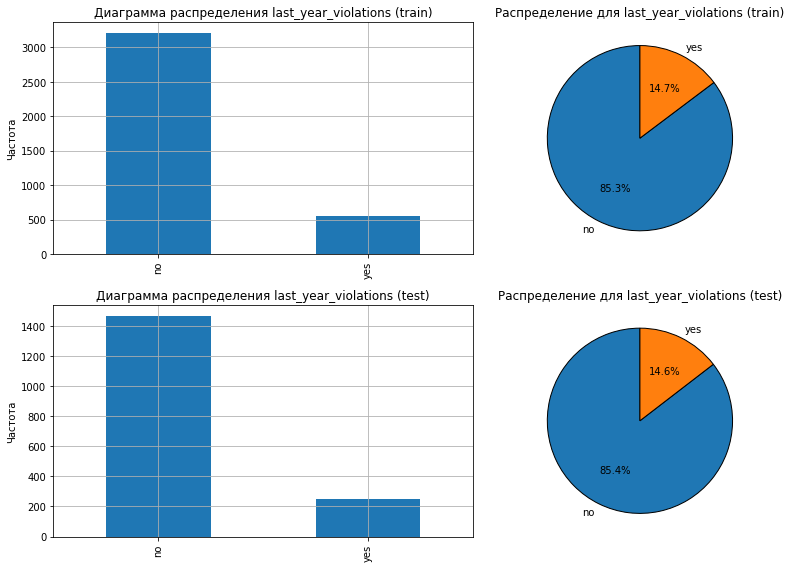


-------------------


In [32]:
string_columns = train_data_job.select_dtypes(include='object')
num_columns = (train_data_job.select_dtypes(include=['int64', 'float64'])).drop(['employment_years', 'supervisor_evaluation'], axis = 1)
discr_columns = ['employment_years', 'supervisor_evaluation']
for col in discr_columns:
    print(f"\nЧастотное распределение для {col} (test):")
    print(test_data_job[col].value_counts())
    print("\nПроцентное соотношение (test):")
    print(test_data_job[col].value_counts(normalize=True) * 100)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train 1
    train_data_job[col].value_counts().plot.bar(ax=axes[0, 0])
    axes[0, 0].set_title(f'Диаграмма распределения {col} (train)', fontsize=12)
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('Частота')
    axes[0, 0].tick_params(axis='x', rotation=90)
    # train 2
    train_data_job[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[0, 1]
    )
    axes[0, 1].set_title(f'Распределение для {col} (train)', fontsize=12)
    axes[0, 1].set_ylabel('')
    # test 1
    test_data_job[col].value_counts().plot.bar(ax=axes[1, 0])
    axes[1, 0].set_title(f'Диаграмма распределения {col} (test)', fontsize=12)
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].tick_params(axis='x', rotation=90)
    # test 2
    test_data_job[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f'Распределение для {col} (test)', fontsize=12)
    axes[1, 1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n-------------------")
    
for col in num_columns:
    print(col)
    print(train_data_job[col].describe())
    print(test_data_job[col].describe())
    # Визуализируем
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train
    train_data_job[col].plot.box(ax=axes[0, 0])
    axes[0, 0].set_title(f'Диаграмма распределения {col} (train)')
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('Значение')
    train_data_job[col].plot.hist(bins=20, ax=axes[0, 1])
    axes[0, 1].set_title(f'Гистограмма {col} (train)')
    axes[0, 1].grid(True)
    axes[0, 1].set_ylabel('Частота')
    axes[0, 1].set_xlabel('Значение')
    #test
    test_data_job[col].plot.box(ax=axes[1, 0])
    axes[1, 0].set_title(f'Диаграмма распределения {col} (test)')
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('Значение')
    test_data_job[col].plot.hist(bins=20, ax=axes[1, 1])
    axes[1, 1].set_title(f'Гистограмма {col} (test)')
    axes[1, 1].grid(True)
    axes[1, 1].set_ylabel('Частота')
    axes[1, 1].set_xlabel('Значение')
    plt.suptitle(f'Распределение {col} в тренировочной и тестовой выборках', fontsize=14)
    plt.tight_layout()
    plt.show()
    print("\n-------------------")

for col in string_columns:
    print(f"\nЧастотное распределение для {col} (test):")
    print(test_data_job[col].value_counts())
    print("\nПроцентное соотношение (test):")
    print(test_data_job[col].value_counts(normalize=True) * 100)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train 1
    train_data_job[col].value_counts().plot.bar(ax=axes[0, 0])
    axes[0, 0].set_title(f'Диаграмма распределения {col} (train)', fontsize=12)
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('Частота')
    axes[0, 0].tick_params(axis='x', rotation=90)
    # train 2
    train_data_job[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[0, 1]
    )
    axes[0, 1].set_title(f'Распределение для {col} (train)', fontsize=12)
    axes[0, 1].set_ylabel('')
    # test 1
    test_data_job[col].value_counts().plot.bar(ax=axes[1, 0])
    axes[1, 0].set_title(f'Диаграмма распределения {col} (test)', fontsize=12)
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].tick_params(axis='x', rotation=90)
    # test 2
    test_data_job[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f'Распределение для {col} (test)', fontsize=12)
    axes[1, 1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n-------------------")

##### Вывод

Тренировочная и тестовая выборки похожи друг на друга и нет заметных перекосов данных 

Почти все данные распоожены внутри "усов", но иногда встречаются более редкие значения, котроые выбиваются из всех остальных

Наблюдаемые количественные переменные не распределены нормально

В наблюдаемых категориальных переменных присутсвует значимый дисбаланс классов

+ Переменные, которые требуют скалирования: `"employment_years "`, `"supervisor_evaluation"`, `"salary"`
+ Переменные, которые требуют кодирования OHE: `"dept"`, `"last_year_promo"`, `"last_year_violations"`
+ Переменные, которые требуют кодирования OrdinalEncoder: `"level"`, `'workload'`	
+ Целевой признак: `"job_satisfaction_rate"` 

#### Корреляционный анализ

Все признаки распределены не нормально, поэтому используем `Phik`

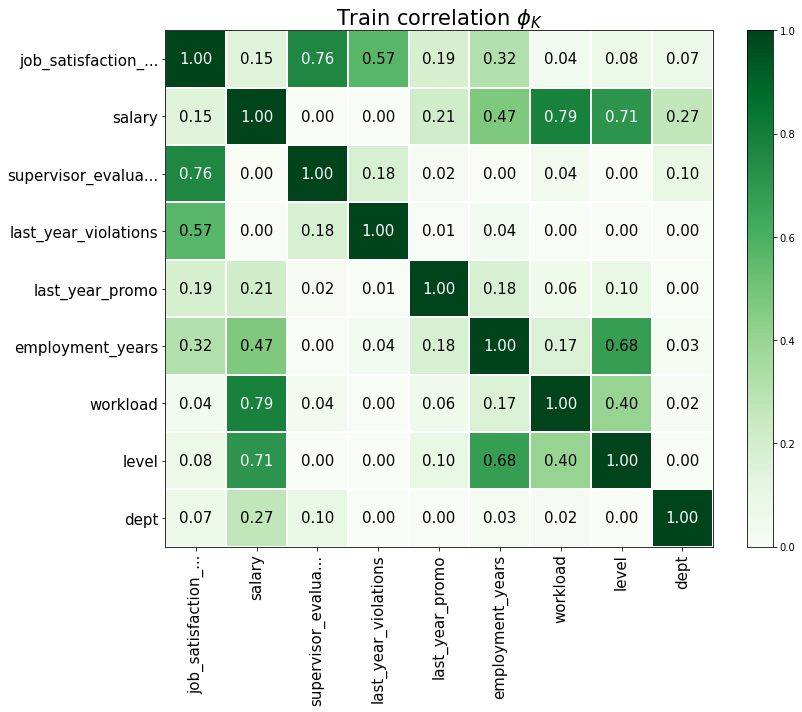

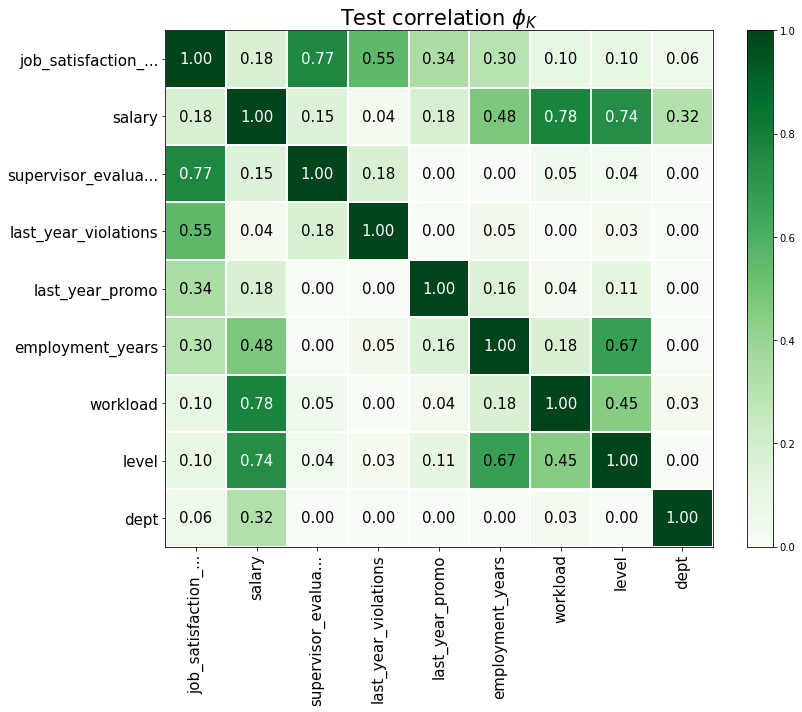

In [33]:
interval_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

phik_train = train_data_job.phik_matrix(interval_cols=interval_cols)
phik_test = test_data_job.phik_matrix(interval_cols=interval_cols)


# Train
plot_correlation_matrix(
    phik_train.values,
    x_labels=phik_train.columns,
    y_labels=phik_train.index,
    vmin=0, vmax=1, color_map='Greens',
    title='Train correlation $\\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 10)  
)

# Test
plot_correlation_matrix(
    phik_test.values,
    x_labels=phik_test.columns,
    y_labels=phik_test.index,
    vmin=0, vmax=1, color_map='Greens',
    title='Test correlation $\\phi_K$',
    fontsize_factor=1.5,
    figsize=(12, 10)
)

##### Вывод

Отсутствует мультиколлинеарность

Отсутствуют утечки

### Шаг 4. Подготовка данных

In [34]:
X_train = train_data_job.drop('job_satisfaction_rate', axis=1)
X_test = test_data_job.drop('job_satisfaction_rate', axis=1)
y_train = train_data_job['job_satisfaction_rate']
y_test = test_data_job['job_satisfaction_rate']

In [35]:
ohe_columns = ["dept", "last_year_promo", "last_year_violations"]
ord_columns = ["level", 'workload']
num_columns = ["employment_years", "supervisor_evaluation", "salary"]

In [36]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first'))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём пайплайн для подготовки признаков из списка num_columns: заполнение пропусков и скалирование
# SimpleImputer + Scaler
num_pipe = Pipeline(
    [('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('scaler', StandardScaler())
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

In [37]:
# создаём итоговый пайплайн для дерева
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

### Шаг 5. Обучение моделей

Введем новую метрику - SMAPE

In [38]:
def SMAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    metric = 100 * np.mean(numerator / denominator)
    return metric

In [39]:
smape_scorer = make_scorer(SMAPE, greater_is_better=False)

----

In [40]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 15),
        'models__max_features': range(2, 10),
        'models__min_samples_split': range(2, 5),
        'models__min_samples_leaf': range(1, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [41]:
%%time
randomized_search_1 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=10,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter = 20
)
randomized_search_1.fit(X_train, y_train)

CPU times: user 6.48 s, sys: 7.78 ms, total: 6.48 s
Wall time: 6.48 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                Si...
                                         'models__max_depth': range(5, 15),
                                         'models__max_features': range(2, 10),
                                         'models__min_samples_leaf': range(1, 6),
                                         'models__min_samples_split': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(SMAPE, greater_is_better=False))

Затраченное время 7.06 s


In [42]:
print('Лучшая модель и её параметры:\n\n', randomized_search_1.best_estimator_)
print ('Метрика лучшей модели с кросс-валидацией:', -randomized_search_1.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
                                 

In [43]:
model_1 = randomized_search_1.best_estimator_
y_pred = model_1.predict(X_test)
print(f"SMAPE = {SMAPE(y_test, y_pred)}")

SMAPE = 14.54835138127017


Проверим, можно ли улучшить модель

Проверим коэффициенты обученной модели

<AxesSubplot:ylabel='Feature'>

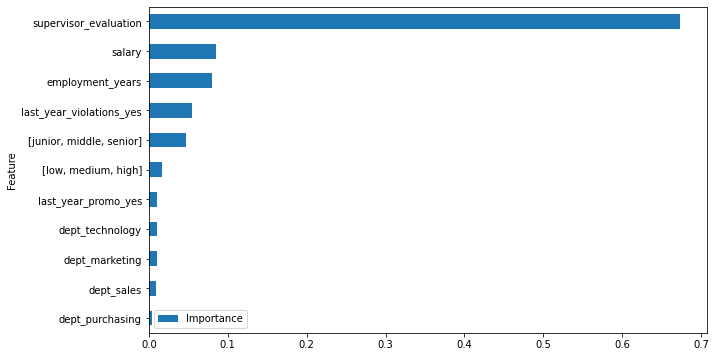

In [44]:
importances = model_1.named_steps['models'].feature_importances_
# Получаем имена признаков после трансформации
# Для OHE
ohe_columns_new = model_1.named_steps['preprocessor'].transformers_[0][1].named_steps['ohe'].get_feature_names_out(ohe_columns)
# Для Ordinal Encoding
ord_columns_new = model_1.named_steps['preprocessor'].transformers_[1][1].named_steps['ord'].categories_
num_columns_new = num_columns
# Объединяем все признаки
all_features = list(ohe_columns_new) + list(ord_columns_new) + list(num_columns_new)

# Создаем DataFrame для визуализации важности признаков
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True) 
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 

т.к DecisionTreeRegressor показывает лучше результаты, то далее будем работать с этой моделью

Попробуем отобрать k лучших признаков при помощи SelectKBest

In [45]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('selector', SelectKBest(mutual_info_regression, k=6)),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [46]:
param_grid = {
    'models__max_depth': distributions.IntDistribution(7, 15),
    'models__max_features': distributions.IntDistribution(2, 9),
    'models__min_samples_split': distributions.IntDistribution(2, 6),
    'models__min_samples_leaf': distributions.IntDistribution(1, 6),
    'selector__k': distributions.IntDistribution(5, 10),
}

In [47]:
%%time
randomized_search = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_trials = 30
)
randomized_search.fit(X_train, y_train)

<timed exec>:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2025-01-20 16:02:05,077] A new study created in memory with name: no-name-c4780575-d052-4226-bcda-affc56401caf
[I 2025-01-20 16:02:16,767] Trial 2 finished with value: -19.51293613541751 and parameters: {'models__max_depth': 7, 'models__max_features': 7, 'models__min_samples_split': 2, 'models__min_samples_leaf': 1, 'selector__k': 7}. Best is trial 2 with value: -19.51293613541751.
[I 2025-01-20 16:02:17,665] Trial 3 finished with value: -19.316122231341133 and parameters: {'models__max_depth': 7, 'models__max_features': 7, 'models__min_samples_split': 3, 'models__min_samples_leaf': 5, 'selector__k': 9}. Best is trial 3 with value: -19.316122231341133.
[I 2025-01-20 16:02:17,672] Trial 4 finished with value: -18.088301839786922 and parameters: {'models__max_depth': 8, 'models__max_features': 7, 'models__min_samples_split': 2, 'models__min_samples_leaf

CPU times: user 44.6 s, sys: 2.88 s, total: 47.5 s
Wall time: 47.6 s


OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('ohe',
                                                                                            OneHotEncoder(drop='first'))]),
                                                                           ['dept',
                                                                            'last_year_promo',
                                                                            'last_year_violations']),
                                                                          ('ord',
                                                                           Pipeline(steps=[('simpleImputer_before_ord',
                                                                                            SimpleI...
               param_distributions={'models__max_depth': IntDistribution(high=15, log=False, low=7, step=1),
                                    'models__max_features': IntDistribution(high=9, log=False, low=2, step=1),
                                    'models__min_samples_leaf': IntDistribution(high=6, log=False, low=1, step=1),
                                    'models__min_samples_split': IntDistribution(high=6, log=False, low=2, step=1),
                                    'selector__k': IntDistribution(high=10, log=False, low=5, step=1)},
               random_state=42,
               scoring=make_scorer(SMAPE, greater_is_better=False))

Затраченное время 2min 28s

In [48]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', -randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
                                 

In [49]:
model_2 = randomized_search.best_estimator_
y_pred = model_2.predict(X_test)
print(f"SMAPE = {SMAPE(y_test, y_pred)}")

SMAPE = 14.465443680007867


Попробуем создать новые признаки при помощи Полиномизации и добавим в пайплайн num_pipe полиномизацию

In [50]:
# Повторяем шаги
num_pipe = Pipeline(
    [('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('scaler', StandardScaler()),
     ('poly', PolynomialFeatures(degree=2))
    ]
    )

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', sparse=False)),
     ('poly', PolynomialFeatures(degree=2))
    ]
    )

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

param_grid = {
    'models__max_depth': distributions.IntDistribution(5, 15),
    'models__min_samples_split': distributions.IntDistribution(2, 5),
    'models__min_samples_leaf': distributions.IntDistribution(1, 6),
    'selector__k': distributions.IntDistribution(5, 10),
}

In [51]:
%%time
randomized_search = OptunaSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_trials = 30
)
randomized_search.fit(X_train, y_train)

<timed exec>:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2025-01-20 16:02:53,042] A new study created in memory with name: no-name-b2eea28d-a14e-4be1-b8fd-9d4188e62f53
[I 2025-01-20 16:03:05,274] Trial 0 finished with value: -15.366857450495877 and parameters: {'models__max_depth': 12, 'models__min_samples_split': 4, 'models__min_samples_leaf': 3, 'selector__k': 10}. Best is trial 0 with value: -15.366857450495877.
[I 2025-01-20 16:03:05,649] Trial 6 finished with value: -18.059250044998425 and parameters: {'models__max_depth': 9, 'models__min_samples_split': 2, 'models__min_samples_leaf': 3, 'selector__k': 8}. Best is trial 0 with value: -15.366857450495877.
[I 2025-01-20 16:03:05,652] Trial 2 finished with value: -17.390405136572383 and parameters: {'models__max_depth': 10, 'models__min_samples_split': 3, 'models__min_samples_leaf': 3, 'selector__k': 8}. Best is trial 0 with value: -15.366857450495877.
[I

CPU times: user 44.9 s, sys: 2.58 s, total: 47.5 s
Wall time: 47.6 s


OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ohe',
                                                                           Pipeline(steps=[('simpleImputer_ohe',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('ohe',
                                                                                            OneHotEncoder(drop='first'))]),
                                                                           ['dept',
                                                                            'last_year_promo',
                                                                            'last_year_violations']),
                                                                          ('ord',
                                                                           Pipeline(steps=[('simpleImputer_before_ord',
                                                                                            SimpleI...
               param_distributions={'models__max_depth': IntDistribution(high=15, log=False, low=5, step=1),
                                    'models__min_samples_leaf': IntDistribution(high=6, log=False, low=1, step=1),
                                    'models__min_samples_split': IntDistribution(high=5, log=False, low=2, step=1),
                                    'selector__k': IntDistribution(high=10, log=False, low=5, step=1)},
               random_state=42,
               scoring=make_scorer(SMAPE, greater_is_better=False))

In [52]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', -randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
                                 

In [53]:
model_3 = randomized_search.best_estimator_
y_pred = model_3.predict(X_test)
print(f"SMAPE = {SMAPE(y_test, y_pred)}")

SMAPE = 15.280145179703844


#### Вывод

+ Лучшей моделью оказалась `DecisionTreeRegressor(max_depth=13, max_features=8, min_samples_leaf=3, min_samples_split=4, random_state=42))`
+ Метрика на тестовоый выборке SMAPE = 14.54835138127017 
+ Время затраченное на поиск с помощью RandomizedSearch и использовании кросс_Валидации -  6.39 s
+ Значимость признака `supervisor_evaluation` заметно отличается от остальных, и от него в большей степени зависит удовлетворенность сотрудника
+ Также важными являются `emplyment_years`, `salary` и `last_year_violations`
+ Почти неважно насколько загруен сотрудник или какой у него grade а также неважно в каком он отделе работает

## Задача 2: предсказание увольнения сотрудника из компании

### Шаг 1. Загрузка данных

In [104]:
train_data_quit = pd.read_csv('/datasets/train_quit.csv', index_col='id')
test_features_quit = pd.read_csv('/datasets/test_features.csv', index_col='id')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', index_col='id')

Создадим функцию для более подробного изучения первчиной информации

In [105]:
datasets_str = ['train_data_quit', 'test_features_quit', 'test_target_quit']
datasets = [train_data_quit, test_features_quit, test_target_quit]

In [106]:
def data_info(dataset):
    print("Первые строки датафрейма")
    display(dataset.head())
    print('\n\nПервичная информация')
    dataset.info()
    print('-' * 50)
    print('\n\n')

In [107]:
for i, dataset in enumerate(datasets):
    print(datasets_str[i])
    data_info(dataset)

train_data_quit
Первые строки датафрейма


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no




Первичная информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB
--------------------------------------------------



test_features_quit
Первые строки датафрейма


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800




Первичная информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB
--------------------------------------------------



test_target_quit
Первые строки датафрейма


,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes




Первичная информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB
--------------------------------------------------





### Шаг 2. Предобработка данных

#### Обьединение таблиц

In [108]:
datasets_str

['train_data_quit', 'test_features_quit', 'test_target_quit']

Обьединим Целевой признак тестовой выборки со входными признаками тестовой выборки

In [109]:
test_data_quit = test_features_quit.join(test_target_quit, how = 'left')
test_data_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no
686555,hr,junior,medium,1,no,no,4,30000,no
467458,sales,middle,low,5,no,no,4,19200,no
418655,sales,middle,low,6,no,no,4,19200,no
789145,hr,middle,medium,5,no,no,5,40800,no


In [110]:
# Check
test_target_quit[test_target_quit.index == 485046]

,quit
id,
485046,no


In [111]:
test_data_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
 8   quit                   2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 220.8+ KB


#### Поиск дубликатов

In [112]:
string_columns = train_data_quit.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(train_data_quit[col].unique())
    print()

dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']

level
['middle' 'junior' 'sinior']

workload
['high' 'medium' 'low']

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']

quit
['no' 'yes']



In [113]:
string_columns = test_data_quit.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(test_data_quit[col].unique())
    print()

dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']

level
['junior' 'middle' 'sinior' nan]

workload
['medium' 'low' 'high' ' ']

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']

quit
['no' 'yes']



Заменим пустые строки на Nan

In [114]:
test_data_quit.loc[test_data_quit['dept'] == ' ', 'dept'] = np.nan
test_data_quit.loc[test_data_quit['workload'] == ' ', 'workload'] = np.nan

In [115]:
test_data_quit.loc[test_data_quit['level'] == 'sinior', 'level'] = 'senior'
train_data_quit.loc[train_data_quit['level'] == 'sinior', 'level'] = 'senior'

In [116]:
#Check
string_columns = test_data_quit.select_dtypes(include='object')
for col in string_columns:
    print(col)
    print(test_data_quit[col].unique())
    print()

dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]

level
['junior' 'middle' 'senior' nan]

workload
['medium' 'low' 'high' nan]

last_year_promo
['no' 'yes']

last_year_violations
['no' 'yes']

quit
['no' 'yes']



Проверм наличие явных дубликатов

In [117]:
print(train_data_quit.reset_index().duplicated().sum())
print(test_data_quit.reset_index().duplicated().sum())

0
0


Нет явныхх дубликатов

In [118]:
train_data_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


In [119]:
test_data_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1997 non-null   object
 1   level                  1999 non-null   object
 2   workload               1999 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
 8   quit                   2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 220.8+ KB


#### Вывод

Выполнена преобработка данных

Данные обьединены в одну таблицу

Исправлены ошибки в заполнении данных 

Дубликаты не обнаружены

### Шаг 3. Исследовательский анализ данных

#### Статистический анализ данных

Создадим функцию для исследования данных


Частотное распределение для employment_years (test):
1     522
2     374
3     234
4     187
5     179
7     174
6     138
8      91
9      66
10     35
Name: employment_years, dtype: int64

Процентное соотношение (test):
1     26.10
2     18.70
3     11.70
4      9.35
5      8.95
7      8.70
6      6.90
8      4.55
9      3.30
10     1.75
Name: employment_years, dtype: float64


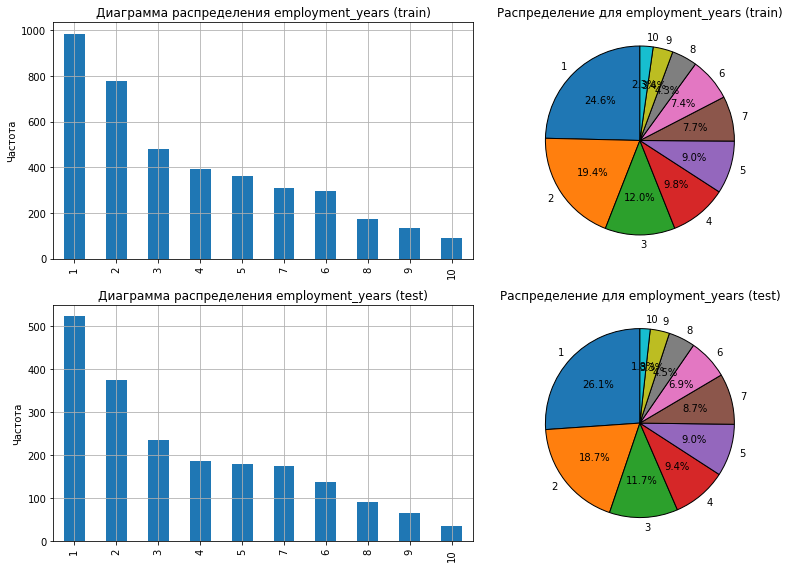


-------------------

Частотное распределение для supervisor_evaluation (test):
4    857
3    575
5    284
2    196
1     88
Name: supervisor_evaluation, dtype: int64

Процентное соотношение (test):
4    42.85
3    28.75
5    14.20
2     9.80
1     4.40
Name: supervisor_evaluation, dtype: float64


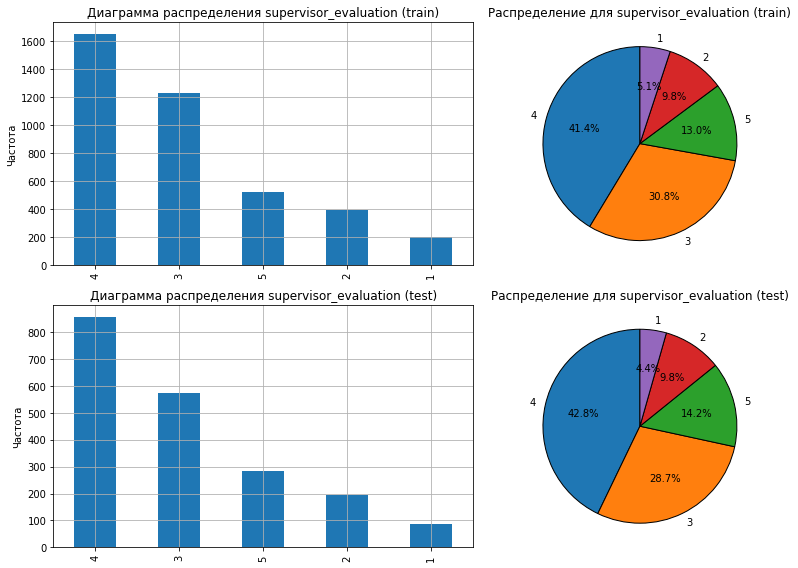


-------------------
salary
count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64
count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


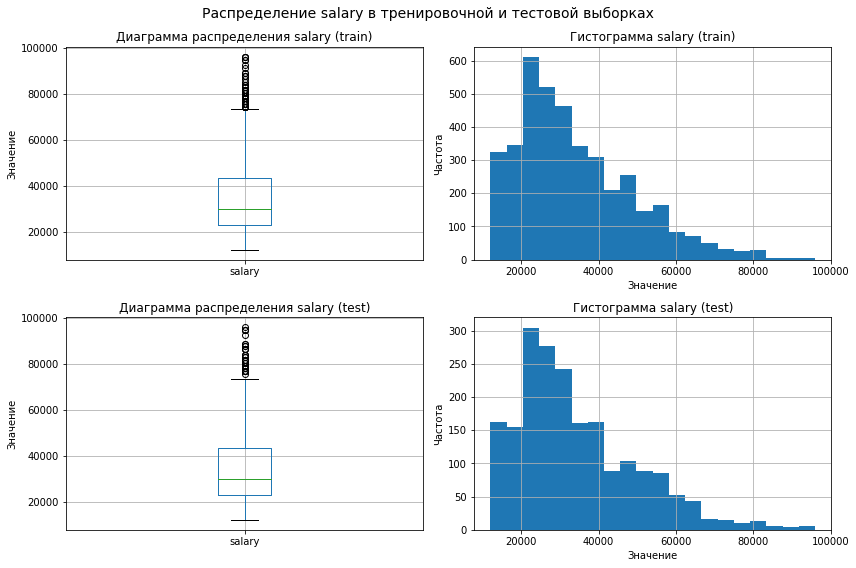


-------------------

Частотное распределение для dept (test):
sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64

Процентное соотношение (test):
sales         38.207311
technology    22.784176
marketing     13.970956
purchasing    13.670506
hr            11.367051
Name: dept, dtype: float64


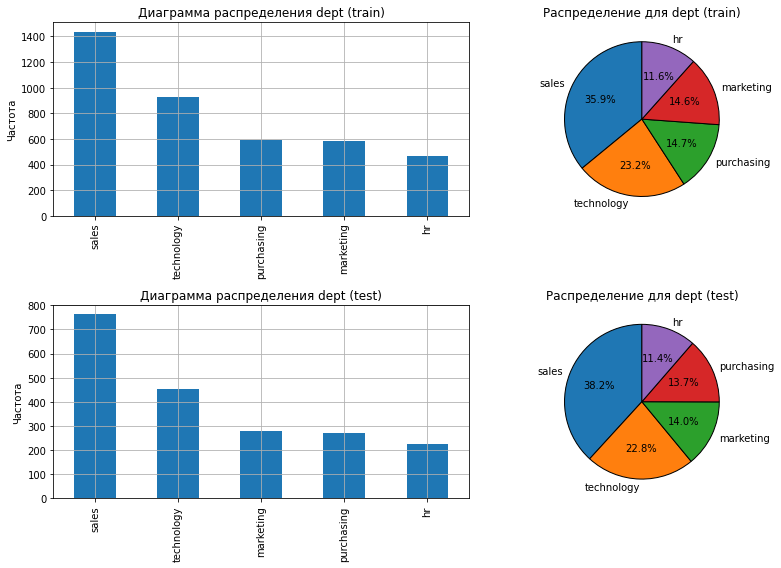


-------------------

Частотное распределение для level (test):
junior    974
middle    854
senior    171
Name: level, dtype: int64

Процентное соотношение (test):
junior    48.724362
middle    42.721361
senior     8.554277
Name: level, dtype: float64


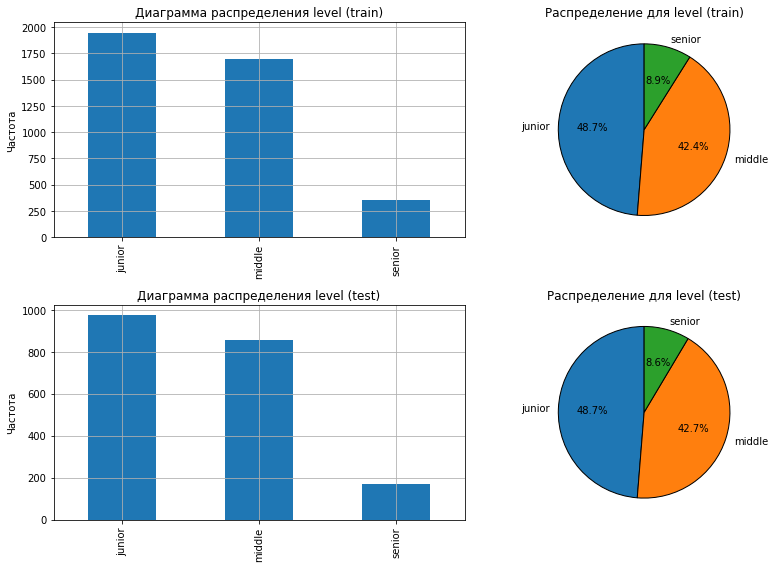


-------------------

Частотное распределение для workload (test):
medium    1043
low        593
high       363
Name: workload, dtype: int64

Процентное соотношение (test):
medium    52.176088
low       29.664832
high      18.159080
Name: workload, dtype: float64


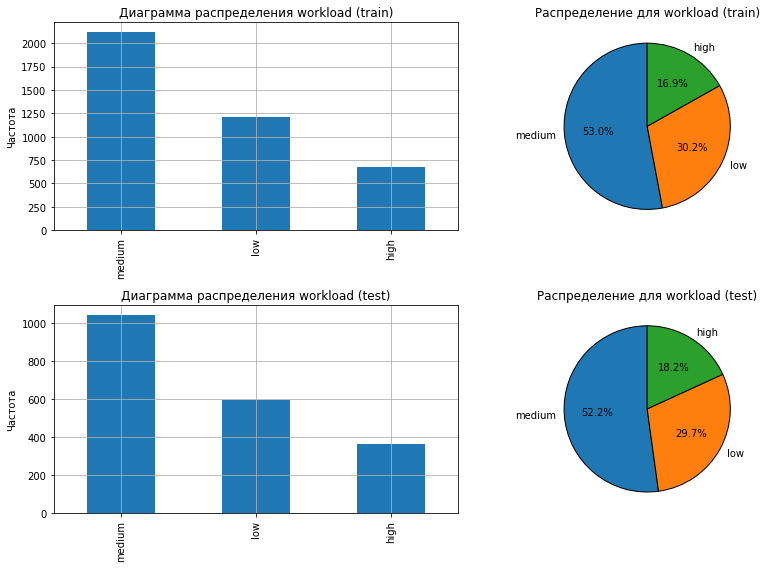


-------------------

Частотное распределение для last_year_promo (test):
no     1937
yes      63
Name: last_year_promo, dtype: int64

Процентное соотношение (test):
no     96.85
yes     3.15
Name: last_year_promo, dtype: float64


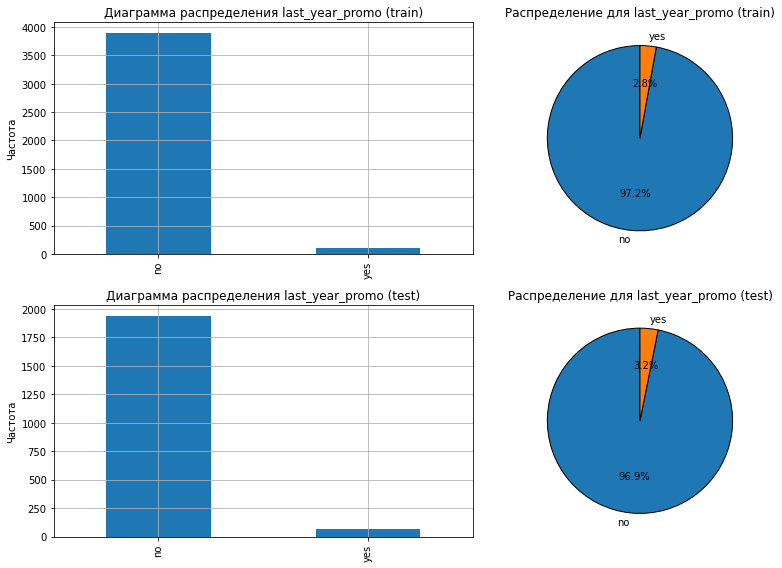


-------------------

Частотное распределение для last_year_violations (test):
no     1738
yes     262
Name: last_year_violations, dtype: int64

Процентное соотношение (test):
no     86.9
yes    13.1
Name: last_year_violations, dtype: float64


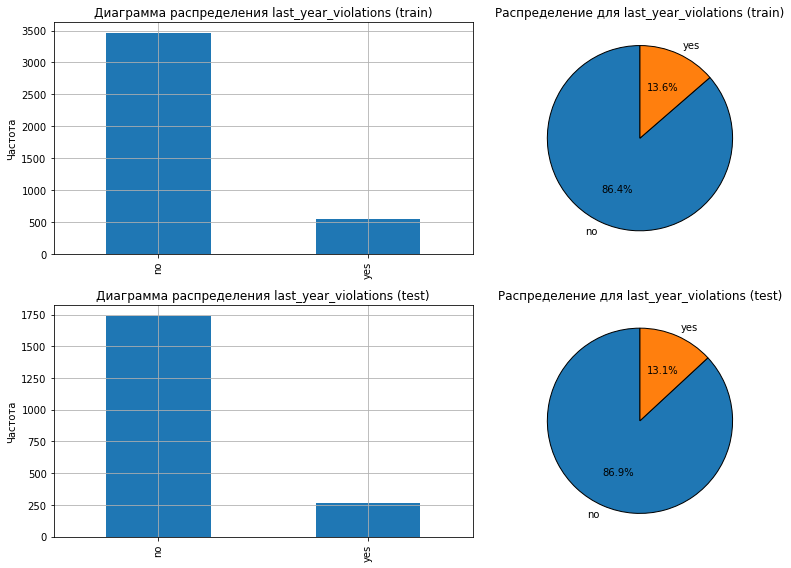


-------------------

Частотное распределение для quit (test):
no     1436
yes     564
Name: quit, dtype: int64

Процентное соотношение (test):
no     71.8
yes    28.2
Name: quit, dtype: float64


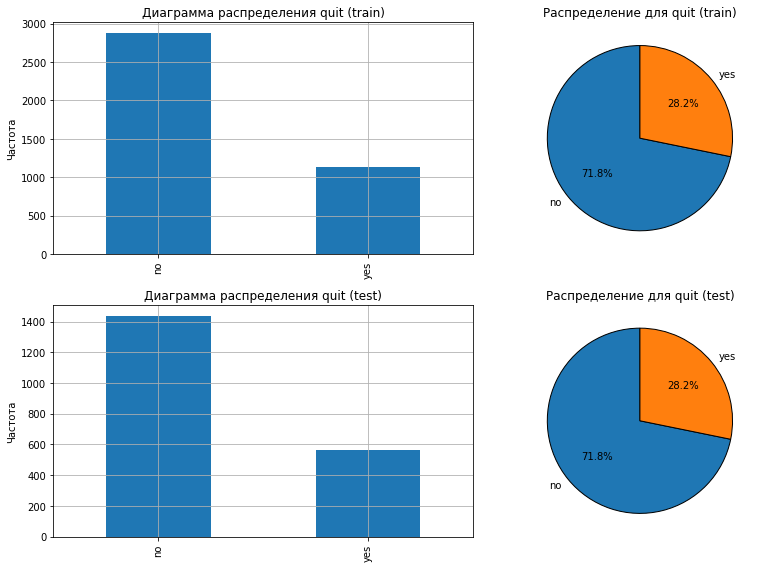


-------------------


In [120]:
string_columns = train_data_quit.select_dtypes(include='object')
num_columns = (train_data_quit.select_dtypes(include=['int64', 'float64'])).drop(['employment_years', 'supervisor_evaluation'], axis = 1)
discr_columns = ['employment_years', 'supervisor_evaluation']
for col in discr_columns:
    print(f"\nЧастотное распределение для {col} (test):")
    print(test_data_quit[col].value_counts())
    print("\nПроцентное соотношение (test):")
    print(test_data_quit[col].value_counts(normalize=True) * 100)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train 1
    train_data_quit[col].value_counts().plot.bar(ax=axes[0, 0])
    axes[0, 0].set_title(f'Диаграмма распределения {col} (train)', fontsize=12)
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('Частота')
    axes[0, 0].tick_params(axis='x', rotation=90)
    # train 2
    train_data_quit[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[0, 1]
    )
    axes[0, 1].set_title(f'Распределение для {col} (train)', fontsize=12)
    axes[0, 1].set_ylabel('')
    # test 1
    test_data_quit[col].value_counts().plot.bar(ax=axes[1, 0])
    axes[1, 0].set_title(f'Диаграмма распределения {col} (test)', fontsize=12)
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].tick_params(axis='x', rotation=90)
    # test 2
    test_data_quit[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f'Распределение для {col} (test)', fontsize=12)
    axes[1, 1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n-------------------")
    
for col in num_columns:
    print(col)
    print(train_data_quit[col].describe())
    print(test_data_quit[col].describe())
    # Визуализируем
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train
    train_data_quit[col].plot.box(ax=axes[0, 0])
    axes[0, 0].set_title(f'Диаграмма распределения {col} (train)')
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('Значение')
    train_data_quit[col].plot.hist(bins=20, ax=axes[0, 1])
    axes[0, 1].set_title(f'Гистограмма {col} (train)')
    axes[0, 1].grid(True)
    axes[0, 1].set_ylabel('Частота')
    axes[0, 1].set_xlabel('Значение')
    #test
    test_data_quit[col].plot.box(ax=axes[1, 0])
    axes[1, 0].set_title(f'Диаграмма распределения {col} (test)')
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('Значение')
    test_data_quit[col].plot.hist(bins=20, ax=axes[1, 1])
    axes[1, 1].set_title(f'Гистограмма {col} (test)')
    axes[1, 1].grid(True)
    axes[1, 1].set_ylabel('Частота')
    axes[1, 1].set_xlabel('Значение')
    plt.suptitle(f'Распределение {col} в тренировочной и тестовой выборках', fontsize=14)
    plt.tight_layout()
    plt.show()
    print("\n-------------------")

for col in string_columns:
    print(f"\nЧастотное распределение для {col} (test):")
    print(test_data_quit[col].value_counts())
    print("\nПроцентное соотношение (test):")
    print(test_data_quit[col].value_counts(normalize=True) * 100)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    # train 1
    train_data_quit[col].value_counts().plot.bar(ax=axes[0, 0])
    axes[0, 0].set_title(f'Диаграмма распределения {col} (train)', fontsize=12)
    axes[0, 0].grid(True)
    axes[0, 0].set_ylabel('Частота')
    axes[0, 0].tick_params(axis='x', rotation=90)
    # train 2
    train_data_quit[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[0, 1]
    )
    axes[0, 1].set_title(f'Распределение для {col} (train)', fontsize=12)
    axes[0, 1].set_ylabel('')
    # test 1
    test_data_quit[col].value_counts().plot.bar(ax=axes[1, 0])
    axes[1, 0].set_title(f'Диаграмма распределения {col} (test)', fontsize=12)
    axes[1, 0].grid(True)
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].tick_params(axis='x', rotation=90)
    # test 2
    test_data_quit[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        ax=axes[1, 1]
    )
    axes[1, 1].set_title(f'Распределение для {col} (test)', fontsize=12)
    axes[1, 1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n-------------------")

##### Вывод

Почти все данные распоожены внутри "усов", но иногда встречаются более редкие значения, котроые выбиваются из всех остальных

Тренировочная и тестовая выборки похожи друг на друга и нет заметных перекосов данных 

Наблюдаемые количественные переменные не распределены нормально

В целевом признаке `quit` наблюдается дисбаланс классов

Переменные, которые требуют скалирования: "employment_years ", "supervisor_evaluation", "salary"
Переменные, которые требуют кодирования OHE: "dept", "last_year_promo", "last_year_violations"
Переменные, которые требуют кодирования OrdinalEncoder: "level", 'workload'
Целевой признак: `"quit"`

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Тут верно проводишь аналогичный анализ что и выше,  но учти   замечания сделанные мной для первой пары данных


 

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправлено</div>

#### Составим портрет «уволившегося сотрудника»

In [121]:
train_data_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


In [122]:
emp_quit = train_data_quit[train_data_quit['quit'] == 'yes']
emp_work = train_data_quit[train_data_quit['quit'] == 'no']
print(emp_quit['quit'].unique())
emp_quit.info()

['yes']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 257132 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1128 non-null   object
 1   level                  1128 non-null   object
 2   workload               1128 non-null   object
 3   employment_years       1128 non-null   int64 
 4   last_year_promo        1128 non-null   object
 5   last_year_violations   1128 non-null   object
 6   supervisor_evaluation  1128 non-null   int64 
 7   salary                 1128 non-null   int64 
 8   quit                   1128 non-null   object
dtypes: int64(3), object(6)
memory usage: 88.1+ KB


Сравним выборки

In [123]:
emp_quit.describe()

,employment_years,supervisor_evaluation,salary
count,1128.000000,1128.000000,1128.000000
mean,1.844858,3.046099,23885.106383
std,1.274920,0.973291,9351.599505
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,16800.000000
50%,1.000000,3.000000,22800.000000
75%,2.000000,4.000000,27600.000000
max,10.000000,5.000000,79200.000000


In [124]:
emp_work.describe()

,employment_years,supervisor_evaluation,salary
count,2872.000000,2872.000000,2872.000000
mean,4.430710,3.643106,37702.228412
std,2.544635,0.965295,15218.977339
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,25200.000000
50%,4.000000,4.000000,34800.000000
75%,6.000000,4.000000,46800.000000
max,10.000000,5.000000,96000.000000


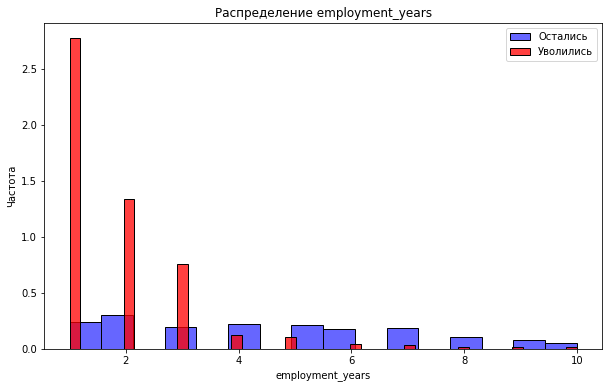

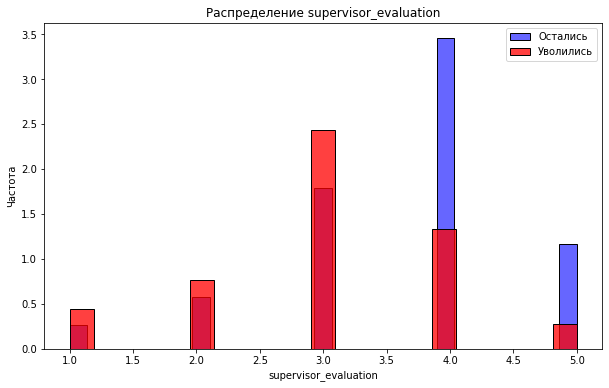

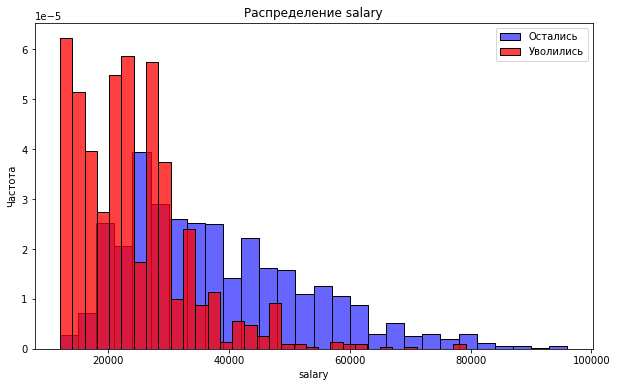

In [125]:
cols_to_hist = ['employment_years','supervisor_evaluation','salary']
for col in cols_to_hist:
    plt.figure(figsize=(10, 6))
    sns.histplot(emp_work[col], label='Остались', color='blue', alpha=0.6, stat='density', common_norm=False)
    sns.histplot(emp_quit[col], label='Уволились', color='red', stat='density', common_norm=False)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

Частотное распределение для dept:
sales         407
technology    276
purchasing    166
marketing     163
hr            116
Name: dept, dtype: int64

Процентное соотношение:
sales         36.081560
technology    24.468085
purchasing    14.716312
marketing     14.450355
hr            10.283688
Name: dept, dtype: float64


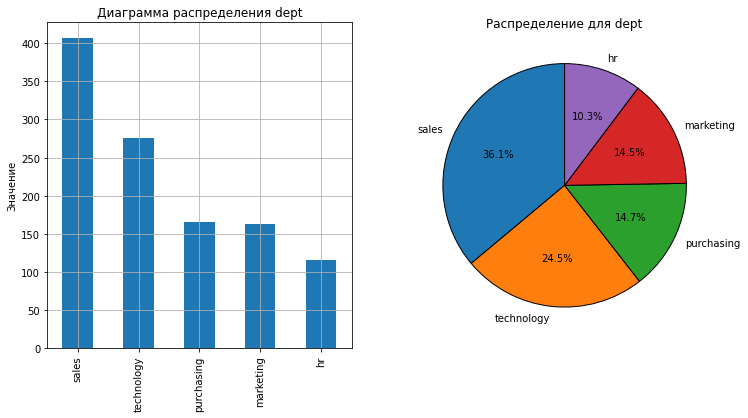


-------------------
Частотное распределение для level:
junior    1003
middle     108
senior      17
Name: level, dtype: int64

Процентное соотношение:
junior    88.918440
middle     9.574468
senior     1.507092
Name: level, dtype: float64


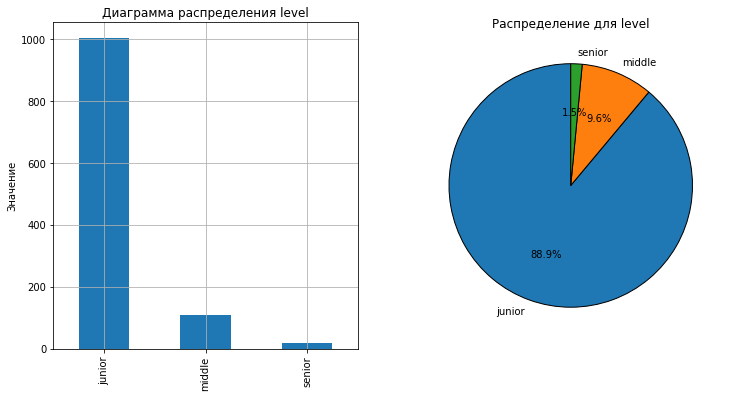


-------------------
Частотное распределение для workload:
low       519
medium    488
high      121
Name: workload, dtype: int64

Процентное соотношение:
low       46.010638
medium    43.262411
high      10.726950
Name: workload, dtype: float64


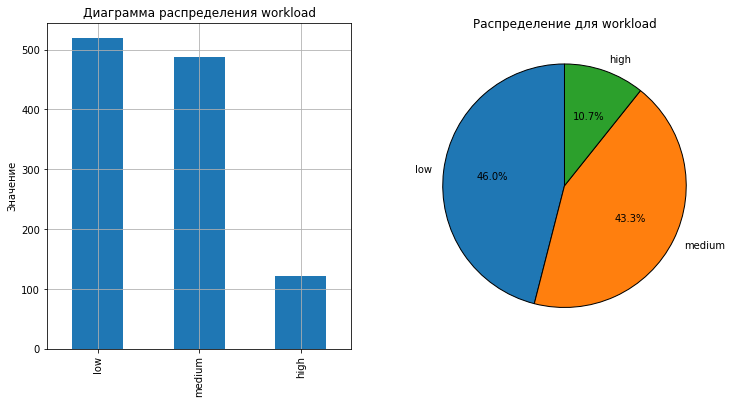


-------------------
Частотное распределение для last_year_promo:
no     1127
yes       1
Name: last_year_promo, dtype: int64

Процентное соотношение:
no     99.911348
yes     0.088652
Name: last_year_promo, dtype: float64


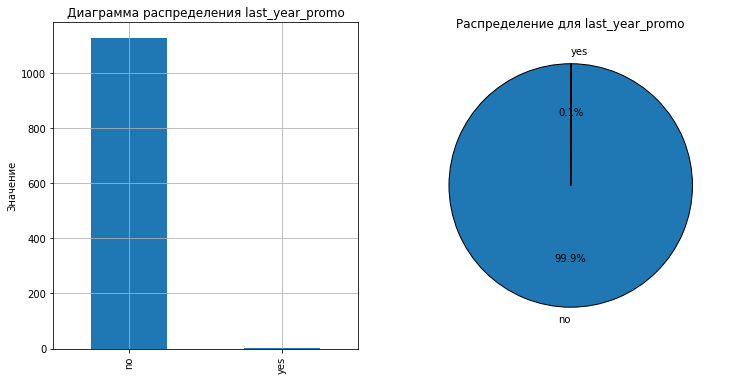


-------------------
Частотное распределение для last_year_violations:
no     900
yes    228
Name: last_year_violations, dtype: int64

Процентное соотношение:
no     79.787234
yes    20.212766
Name: last_year_violations, dtype: float64


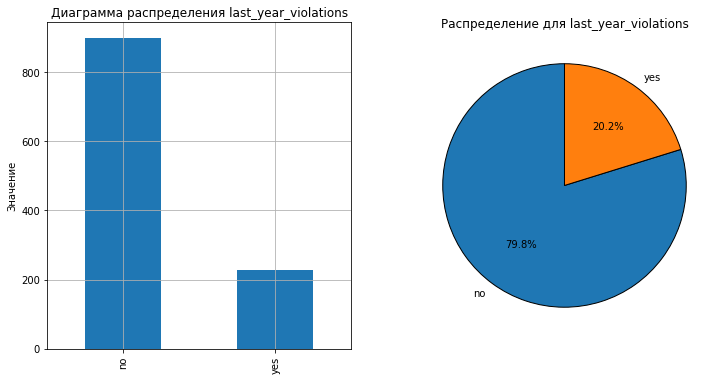


-------------------
Частотное распределение для quit:
yes    1128
Name: quit, dtype: int64

Процентное соотношение:
yes    100.0
Name: quit, dtype: float64


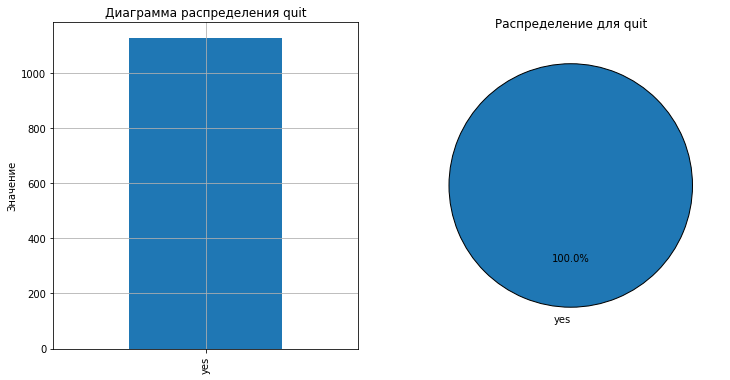


-------------------


In [126]:
string_columns = emp_quit.select_dtypes(include='object')

for col in string_columns:
    print(f"Частотное распределение для {col}:")
    print(emp_quit[col].value_counts())
    print("\nПроцентное соотношение:")
    print(emp_quit[col].value_counts(normalize=True) * 100)

    # Визуализация распределения
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    emp_quit[col].value_counts().plot.bar(ax=axes[0])
    axes[0].set_title(f'Диаграмма распределения {col}')
    axes[0].grid(True)
    axes[0].set_ylabel('Значение')
    axes[0].tick_params(axis='x', rotation=90)
    emp_quit[col].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    plt.title(f'Распределение для {col}')
    plt.ylabel('')
    plt.show()

    print("\n-------------------")

Проведем анализ относительных величин

Процентное соотношение уволившихся dept:
sales         28.303199
technology    29.741379
purchasing    28.231293
marketing     28.006873
hr            25.000000
Name: dept, dtype: float64


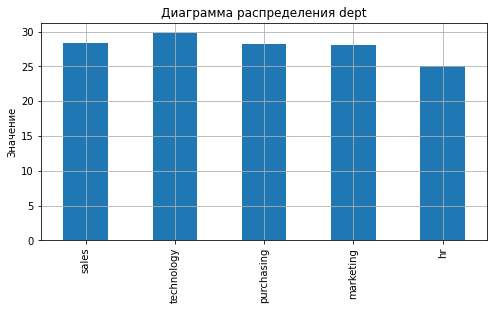


-------------------
Процентное соотношение уволившихся workload:
high      17.952522
low       42.963576
medium    23.040604
Name: workload, dtype: float64


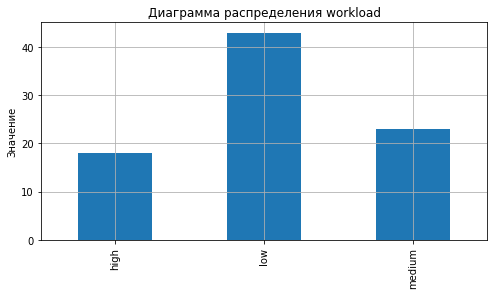


-------------------
Процентное соотношение уволившихся level:
junior    51.462288
middle     6.375443
senior     4.761905
Name: level, dtype: float64


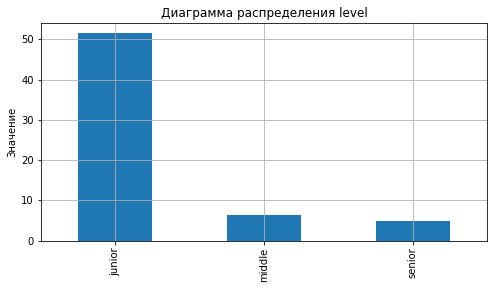


-------------------


In [127]:
cols = ['dept', 'workload', 'level']

for col in cols:
    rel_analys = emp_quit[col].value_counts()/train_data_quit[col].value_counts()*100
    print(f"Процентное соотношение уволившихся {col}:")
    print(rel_analys)
    
    # Визуализация распределения
    plt.figure(figsize=(8, 4))
    rel_analys.plot.bar()
    plt.title(f'Диаграмма распределения {col}')
    plt.grid(True)
    plt.ylabel('Значение')
    plt.tick_params(axis='x', rotation=90)
    plt.show()
    print("\n-------------------")

##### Вывод

+ Уволившиеся сотрудники в среднем имели опыт работы в компнии меньше примерно на 3 года

+ Получали более низкую оценку качества работы сотрудника

+ Получали зарпоату в среднем на 15000 меньше остальных

+ 89 процентов уволившихся были джунами, а увольняется 51 процентов всех джунов

+ 46 процента уволвшихся имели низкий уровень загруженности и 43 процента средний уровень

+ Процентное соотношение уволившихся по отделам:
    + sales         36.081560
    + technology    24.468085
    + purchasing    14.716312
    + marketing     14.450355
    + hr            10.283688
    
+ Но заметим, что Процентное соотношение уволившихся по отделам отличается:
    + sales         28.303199
    + technology    29.741379
    + purchasing    28.231293
    + marketing     28.006873
    + hr            25.000000
    
Больше всего уволнений из отдела `technology`

#### Анализ связи удовлеторенности работой и увольнения

Для анализа используем данные с обоими целевыми признаками тестовой выборки

In [128]:
test_data_analys = test_data_job.join(test_target_quit, how = 'left')
test_data_analys.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
467458,sales,middle,low,5,no,no,4,19200,0.64,no
418655,sales,middle,low,6,no,no,4,19200,0.60,no
789145,hr,middle,medium,5,no,no,5,40800,0.75,no
429973,purchasing,middle,medium,6,no,no,3,42000,0.67,yes


Построим матрицу корреляции phik

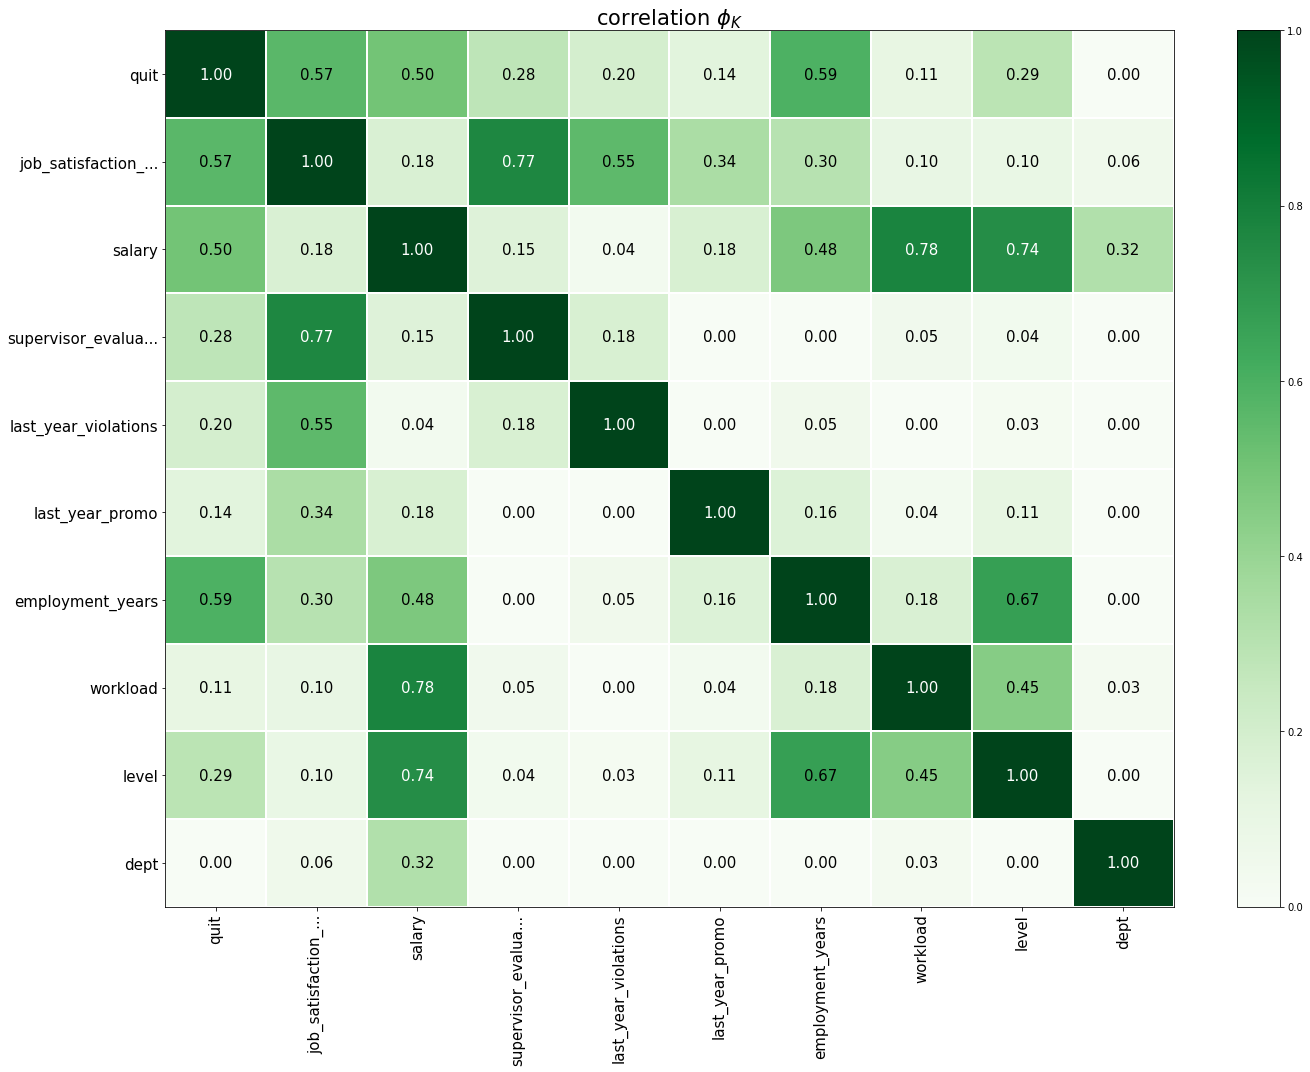

In [129]:
interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']
phik_overview = test_data_analys.phik_matrix(interval_cols=interval_cols)

# Визуализация корреляционной матрицы
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

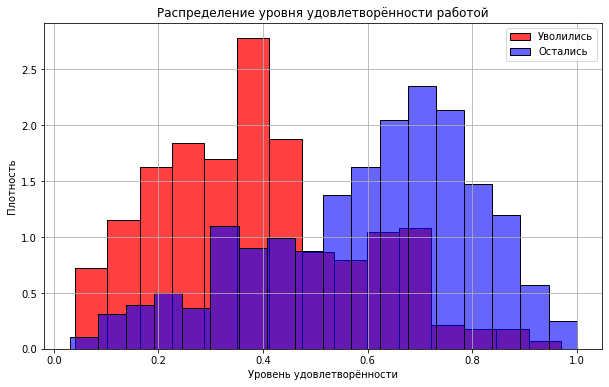

In [130]:
# Разделяем на группы
quit_yes = test_data_analys[test_data_analys['quit'] == 'yes']
quit_no = test_data_analys[test_data_analys['quit'] == 'no']

# Визуализация распределений
plt.figure(figsize=(10, 6))
sns.histplot(quit_yes['job_satisfaction_rate'], label='Уволились', color='red', stat='density', common_norm=False)
sns.histplot(quit_no['job_satisfaction_rate'], label='Остались', color='blue', alpha=0.6, stat='density', common_norm=False)
plt.title('Распределение уровня удовлетворённости работой')
plt.xlabel('Уровень удовлетворённости')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

##### Статистический тест

+ H₀: Нет зависимости между уровнем удовлетворённости работой и увольнением

+ H₁: Есть зависимость между уровнем удовлетворённости работой и увольнением

Дискретизируем переменную `'job_satisfaction_rate'`

In [131]:
test_data_analys['job_rate_dis'] = test_data_analys['job_satisfaction_rate'].apply(
    lambda x: 'high' if x >= 0.7 else ('medium' if 0.4 <= x < 0.7 else 'low')
)
test_data_analys.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit,job_rate_dis
id,,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no,high
467458,sales,middle,low,5,no,no,4,19200,0.64,no,medium
418655,sales,middle,low,6,no,no,4,19200,0.60,no,medium
789145,hr,middle,medium,5,no,no,5,40800,0.75,no,high
429973,purchasing,middle,medium,6,no,no,3,42000,0.67,yes,medium


Будем использовать `Критерий хи-квадрат независимости номинальных признаков`

In [132]:
# таблица сопряженноси
contingency_table = pd.crosstab(test_data_analys['job_rate_dis'], test_data_analys['quit'])
contingency_table

quit,no,yes
job_rate_dis,,
high,486,23
low,238,245
medium,546,179


In [133]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [134]:
alpha = 0.05 
if p_value < alpha:
    print(f"Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу т.к. наблюдаемое значение статистики не попало в область естественных значений, то на уровне значимости {alpha} данные не соответствуют нулевой гипотезе, то есть мы отвергаем нулевую гипотезу и принимаем альтернативную о том, что есть зависимость между уровнем удовлетворённости работой и увольнением")
else:
    print(f"Т.к. наблюдаемое значение статистики попало в область естественных значений, то на уровне значимости {alpha} данные не противоречат основной гипотезе, т.е. мы не отвергаем  гипотезу о том, что нет зависимости между уровнем удовлетворённости работой и увольнением")

Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу т.к. наблюдаемое значение статистики не попало в область естественных значений, то на уровне значимости 0.05 данные не соответствуют нулевой гипотезе, то есть мы отвергаем нулевую гипотезу и принимаем альтернативную о том, что есть зависимость между уровнем удовлетворённости работой и увольнением


##### Вывод

+ Из матрица корреляции мы видим, что целевой признак `quit` и `'job_satisfaction_rate'` имеют средний уровень зависимости 0.61

+ Распределение показывает, что уволившиеся сотрудники были меньше удовлетворены работой

А значит какая-то связь у этих признаков есть и благодаря статистическому тесту у нас есть основания полагать, что есть зависимость между уровнем удовлетворённости работой и увольнением

### Шаг 4. Добавление нового входного признака

Лучшая модель предыдущей задачи - `model_1`

С помощью нее предскажем `'job_satisfaction_rate'` для 2 задачи

In [135]:
job_rate_train = model_1.predict(train_data_quit.drop('quit', axis = 1))
job_rate_test = model_1.predict(test_data_quit.drop('quit', axis = 1))
job_rate_train

array([0.62      , 0.85352941, 0.3325    , ..., 0.5175    , 0.55333333,
       0.515     ])

In [136]:
train_data_quit['predicted_job_satisfaction_rate'] = job_rate_train
test_data_quit['predicted_job_satisfaction_rate']= job_rate_test
display(train_data_quit.head())
test_data_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,predicted_job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.620000
814010,sales,junior,medium,2,no,no,4,27600,no,0.853529
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.332500
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.358750
910140,marketing,junior,medium,2,no,no,5,25200,no,0.791667


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,predicted_job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.860000
686555,hr,junior,medium,1,no,no,4,30000,no,0.680000
467458,sales,middle,low,5,no,no,4,19200,no,0.690000
418655,sales,middle,low,6,no,no,4,19200,no,0.713333
789145,hr,middle,medium,5,no,no,5,40800,no,0.710952


### Шаг 5. Подготовка данных

In [137]:
X_train = train_data_quit.drop('quit', axis=1)
X_test = test_data_quit.drop('quit', axis=1)
y_train = train_data_quit['quit']
y_test = test_data_quit['quit']

In [138]:
#закодируем целевой признак
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test) 
label_encoder.classes_

array(['no', 'yes'], dtype=object)

т.к в тренировочноый выборке присутсвуе дисбаланс классов, то применим oversampling

In [139]:
class_mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}
print(class_mapping)

{'no': 0, 'yes': 1}


In [140]:
ohe_columns = ["dept", "last_year_promo", "last_year_violations"]
ord_columns = ["level", 'workload']
num_columns = ["employment_years", "supervisor_evaluation", "salary", 'predicted_job_satisfaction_rate']

In [141]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first'))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'], 
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём пайплайн для подготовки признаков из списка num_columns: заполнение пропусков и скалирование
# SimpleImputer + Scaler
num_pipe = Pipeline(
    [('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('scaler', StandardScaler())
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

In [142]:
# создаём итоговый пайплайн для дерева
pipe_final= ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('oversampling', ADASYN(random_state=RANDOM_STATE)),  # Oversampling
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

### Шаг 6. Обучение модели

In [143]:
# создаём итоговый пайплайн для дерева
pipe_final= ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('oversampling', ADASYN(random_state=RANDOM_STATE)),  # Oversampling
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [144]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 12),
        'models__min_samples_split': range(2, 5),
        'models__min_samples_leaf': range(1, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()]  
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l2'
        )],
        'models__C': range(10, 12),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [145]:
randomized_search_1 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=10,
    scoring = 'roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter = 40
)
randomized_search_1.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                Si...
                                         'models__min_samples_leaf': range(1, 6),
                                         'models__min_samples_split': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [KNeighborsClassifier()]},
                                        {'models': [LogisticRegression(random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(10, 12),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [146]:
print('Лучшая модель и её параметры:\n\n', randomized_search_1.best_estimator_)
print ('Метрика лучшей модели с кросс-валидацией:', randomized_search_1.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
                                 

In [147]:
model_2_1 = randomized_search_1.best_estimator_
y_pred_probas = model_2_1.predict_proba(X_test)[:, 1]
print(f"AUC-ROC = {round(roc_auc_score(y_test, y_pred_probas),2)}")

AUC-ROC = 0.92


Проверим, можно ли улучшить модель

Проверим коэффициенты обученной модели

<AxesSubplot:ylabel='Feature'>

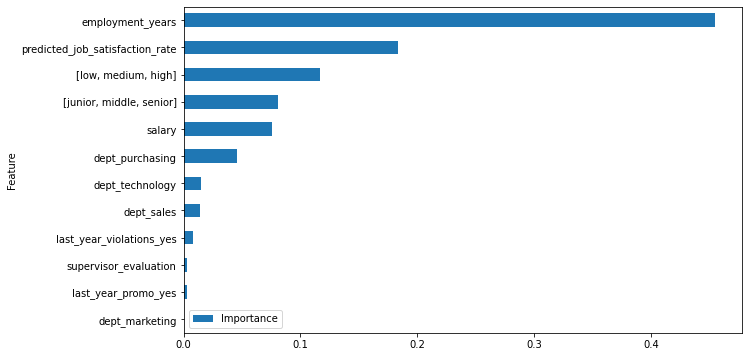

In [148]:
if isinstance(model_2_1.named_steps['models'], LogisticRegression):
    importances = model_2_1.named_steps['models'].coef_[0]
else:
    importances = model_2_1.named_steps['models'].feature_importances_

# Получаем имена признаков после трансформации
# Для OHE
ohe_columns_new = model_2_1.named_steps['preprocessor'].transformers_[0][1].named_steps['ohe'].get_feature_names_out(ohe_columns)
# Для Ordinal Encoding
ord_columns_new = model_2_1.named_steps['preprocessor'].transformers_[1][1].named_steps['ord'].categories_
num_columns_new = num_columns
# Объединяем все признаки
all_features = list(ohe_columns_new) + list(ord_columns_new) + list(num_columns_new)

# Создаем DataFrame для визуализации важности признаков
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True) 
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)) 

Добавим отбор k лучших признаков при помощи SelectKBest

In [149]:
pipe_final= ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('oversampling', ADASYN(random_state=RANDOM_STATE)),  # Oversampling
    ('selector', SelectKBest(mutual_info_classif, k=6)),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [150]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 12),
        'models__min_samples_split': range(2, 6),
        'models__min_samples_leaf': range(1, 6), 
        'selector__k': range(6, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]    

In [151]:
randomized_search_2 = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=10,
    scoring = 'roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter = 40
)
randomized_search_2.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                Si...
                   param_distributions=[{'models': [DecisionTreeClassifier(max_depth=5,
                                                                           min_samples_leaf=2,
                                                                           min_samples_split=3,
                                                                           random_state=42)],
                                         'models__max_depth': range(5, 12),
                                         'models__min_samples_leaf': range(1, 6),
                                         'models__min_samples_split': range(2, 6),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough'],
                                         'selector__k': range(6, 10)}],
                   random_state=42, scoring='roc_auc')

In [152]:
print('Лучшая модель и её параметры:\n\n', randomized_search_2.best_estimator_)
print ('Метрика лучшей модели с кросс-валидацией:', randomized_search_2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent...
                                 

In [153]:
model_2_2 = randomized_search_2.best_estimator_
y_pred_probas = model_2_2.predict_proba(X_test)[:, 1]
print(f"AUC-ROC = {round(roc_auc_score(y_test, y_pred_probas),2)}")

AUC-ROC = 0.93


#### Вывод

+ Лучшей моделью оказалась `DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=3, random_state=42))`
+ SelectKBest(k=6,score_func=mutual_info_classif)
+ AUC-ROC = 0.91

## Этап 3: Общий вывод

**Задача 1. Предсказание уровня удовлетворённости сотрудника**

1. **Задача** Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика

2. В исходных данных содержались ошибки 
    + Были исправлены ошибки в заполнении данных
    + Удалены дубликаты
3. Для поиска лучшей модели был собран пайплайн, который включает в себя преобработку данных, а также само обучение, далее запущен рандомизированных поиск с подбором гиперпараметров для каждой из 2 моделей: 
    + DecisionTreeRegressor
    + LinearRegression()
    
Для поиска лучшей модели также использовалась полиномизация признаков, и отбор лучших признаокв  

4. Лучшей моделью оказалась DecisionTreeRegressor(max_depth=13, max_features=8, min_samples_leaf=3, min_samples_split=4, random_state=42) c SMAPE = 14.54835138127017

5. Самыми важными признаками для определения удовлетворенности работой оказались `supervisor_evaluation` `emplyment_years`, `salary` и `last_year_violations`

6. Рекомендации для бизнеса:
+ **Фокус на развитии культуры обратной связи:**  
  Внедрить регулярные справедливые оценки сотрудников и честные обсуждения их успехов и проблем. Это может повысить общий уровень удовлетворённости
+ **Программы мотивации по стажу работы:**  
  Разработать специальные бонусы или привилегии для сотрудников с более длительным стажем
+ **Поддержание справедливой оплаты труда:**  
  Убедитесь, что зарплаты соответствуют рынку, особенно для сотрудников с высокими оценками со стороны руководства
+ **Обучение и поддержка:**  
  Организуйте программы профилактики нарушений и улучшите систему адаптации новых сотрудников, чтобы н нарушений становилось меньше
 
**Задача 2. Предсказание увольнения сотрудника**
1. **Задача** Построить модель, которая сможет, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании

2. В исходных данных содержались ошибки 
    + Были исправлены ошибки в заполнении данных
    + Удалены дубликаты
3. Для поиска лучшей модели был собран пайплайн, который включает в себя преобработку данных, а также само обучение, далее запущен рандомизированных поиск с подбором гиперпараметров для каждой из 3 моделей: 
    + DecisionTreeClassifier()
    + KNeighborsClassifier()
    + LogisticRegression()
    
Для поиска лучшей модели также использовалcя отбор лучших признаокв  

4. Лучшей моделью оказалась `DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42))`
+ SelectKBest(k=9,score_func=mutual_info_classif)
+ AUC-ROC = 0.92

5. Самыми важными признаками для определения удовлетворенности работой оказались `level`	`workload`	`employment_years` `salary`	`predicted_job_satisfaction_rate`

6. Рекомендации для бизнеса:
- **Оптимизация рабочей нагрузки:**  
  Перераспределить обязанности, чтобы избежать перегрузки сотрудников, особенно в начальных этапах их работы
- **Прогнозирование увольнений:**  
  Использовать построенную модель для регулярного мониторинга и предсказания рисков увольнений. Это позволит вовремя принимать меры для удержания ключевых сотрудников
- **Поддержка на началых этапах:**  
  Уделять больше внимания сотрудникам в первые годы работы, так как вероятность увольнения в этот период наиболее высокая

- **Исследовать отдел 'technology', чтобы узнать причины большого количества увольнений**  

**Дополнительные предложения для бизнеса:**
1. **Автоматизация HR-аналитики:**  
   Внедрить систему автоматического мониторинга ключевых HR-метрик на основе разработанных моделей. Это позволит своевременно выявлять зоны риска

2. **Создание системы раннего оповещения:**  
   На основе прогноза увольнений разработать систему предупреждений для руководителей, чтобы они могли оперативно реагировать на потенциальные увольнения.

**Заключение:**
Построенные модели помогут компании эффективно управлять удовлетворённостью сотрудников и снизить уровень увольнений